In [10]:
documents = []

file = open('Tratando Arquivos/nytimes.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 200 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 7
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf)

In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [14]:
no_top_words = 5
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: brett sexual kavanaugh assault accused
Topic #1: said yes night sesame best
Topic #2: know briefing day need end
Topic #3: trump president legal war nearly
Topic #4: south korea north china jong
Topic #5: emmys winners list complete red
Topic #6: hill judge anita kavanaugh writes



In [15]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 6), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
Doc0,0,0.00933,0.068234,0.548124,0,0,0,3
Doc1,0,0.409522,0,0,0.602927,0,0,4
Doc2,0,0.336732,0,0.566878,0.045447,0,0,3
Doc3,0,0,0.853015,0,0,0,0,2
Doc4,0.119272,0.478685,0,0,0,0.057896,0,1
Doc5,0.452642,0.958456,0,0,0,0,0.356597,1
Doc6,0,0.043807,0,0,0,0,0,1
Doc7,0,0,0.196372,0.123436,0.065577,0,0,2
Doc8,0.320111,0.014518,0,0.011582,0,0.024902,0,0
Doc9,0,0.398396,0,0.286336,0,0.046099,0,1


In [16]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,37
1,5,33
2,1,31
3,4,25
4,3,25
5,2,11
6,6,7


In [19]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 0:
        print(documents[i])
    i = i + 1

Call crazy I think 17 year olds worry sexual assault commit might follow around rest lives would GREAT thing TV writer tweeted 

Christine Blasey Ford accused Brett Kavanaugh sexual assault said wants FBI investigate claims Here look means Supreme Court confirmation process 

A detailed look Americans social lives online 

How ranch dressing became America favorite flavor 

Angela Merkel spy chief suggested video dark skinned man chased far right protesters fake directly contradicting chancellor 

The hotel maintained tranquillity defied crisis unfolding miles away 

I imagine readers thinking sitting around kitchen aprons It 

In Opinion 

Hold burgers hold fries Keep hands thighs McDonald employees across U S protested sexual harassment workplace 

As climate change rapid growth bring flooding residents officials Carolinas must grapple rebuild prepare next storm 

Christine Blasey Ford claim Judge Brett Kavanaugh drunkenly sexually assaulted drawn attention speeches reminisced heavy 

Text(0.5,1,'Segregation of Topic Clusters')

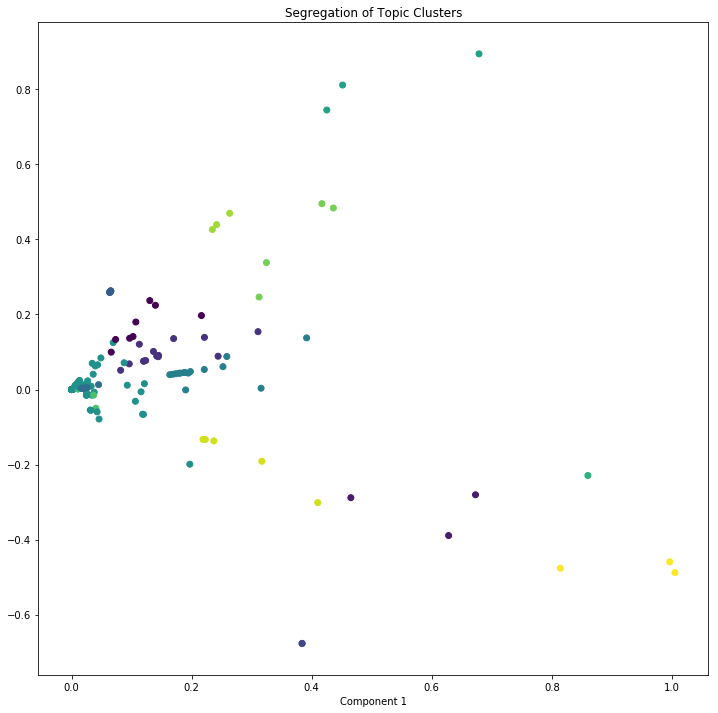

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [18]:
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
Doc0,0,0.00933,0.068234,0.548124,0,0,0,3
Doc1,0,0.409522,0,0,0.602927,0,0,4
Doc2,0,0.336732,0,0.566878,0.045447,0,0,3
Doc3,0,0,0.853015,0,0,0,0,2
Doc4,0.119272,0.478685,0,0,0,0.057896,0,1
Doc5,0.452642,0.958456,0,0,0,0,0.356597,1
Doc6,0,0.043807,0,0,0,0,0,1
Doc7,0,0,0.196372,0.123436,0.065577,0,0,2
Doc8,0.320111,0.014518,0,0.011582,0,0.024902,0,0
Doc9,0,0.398396,0,0.286336,0,0.046099,0,1
